In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
chaos_file="../data/chaos_low.dat"
MLE=np.loadtxt(chaos_file)[:,3]
df=pd.DataFrame(columns=["n_blocks","MLE (Hz)","W_avg (V)","W_std (V)","W_min (V)","W_max (V)","W_pp (V)"])
multiplier=1
for n_b in range(2,26):
    if n_b==2:
        wf_file="../2_blocks/2_blocks_avg.csv"
    elif n_b%2==0:
        wf_file="../"+str(n_b)+"_blocks/"+str(n_b)+"_blocks.csv"
    else:
        wf_file="../"+str(n_b)+"_blocks/edge/"+str(n_b)+"_blocks.csv"
    W=np.loadtxt(wf_file)[:,2]
    if n_b>10:
        multiplier=10
    W_avg=np.mean(W)*multiplier
    W_std=np.std(W)*multiplier
    W_min=np.min(W)*multiplier
    W_max=np.max(W)*multiplier
    df.loc[n_b-2]=[int(n_b),int(MLE[n_b-2]),round(W_avg,2),round(W_std,2),round(W_min,2),round(W_max,2),round(W_max-W_min,2)]
df=df.set_index("n_blocks")
df

,MLE (Hz),W_avg (V),W_std (V),W_min (V),W_max (V),W_pp (V)
n_blocks,,,,,,
2.0,54.0,-0.36,0.73,-1.47,1.18,2.65
3.0,439.0,-0.48,0.61,-1.45,1.16,2.61
4.0,1032.0,-0.50,0.59,-1.47,1.39,2.86
5.0,987.0,-0.44,0.64,-1.44,1.58,3.02
6.0,770.0,-0.44,0.65,-1.47,1.65,3.11
7.0,804.0,-0.43,0.66,-1.47,1.65,3.11
8.0,862.0,-0.41,0.67,-1.47,1.76,3.22
9.0,817.0,-0.40,0.67,-1.47,1.83,3.30
10.0,892.0,-0.40,0.67,-1.47,1.91,3.37


In [3]:
chaos_file_middle="../data/chaos_low_middle.dat"
MLE_middle=np.loadtxt(chaos_file_middle)[:,3]
df_middle=pd.DataFrame(columns=["n_blocks","MLE (Hz)","W_avg (V)","W_std (V)","W_min (V)","W_max (V)","W_pp (V)"])
i=0
multiplier=1
for n_b in range(2,26):
    if(n_b%2!=0):
        wf_file="../"+str(n_b)+"_blocks/middle/"+str(n_b)+"_blocks_middle.csv"
        W=np.loadtxt(wf_file)[:,2]
        if n_b>10:
            multiplier=10
        W_avg=np.mean(W)*multiplier
        W_std=np.std(W)*multiplier
        W_min=np.min(W)*multiplier
        W_max=np.max(W)*multiplier
        df_middle.loc[i]=[int(n_b),int(MLE_middle[i]),round(W_avg,2),round(W_std,2),round(W_min,2),round(W_max,2),round(W_max-W_min,2)]
        i+=1
df_middle=df_middle.set_index("n_blocks")
df_middle

,MLE (Hz),W_avg (V),W_std (V),W_min (V),W_max (V),W_pp (V)
n_blocks,,,,,,
3.0,427.0,-0.50,0.57,-1.45,1.16,2.61
5.0,1771.0,-0.54,0.49,-1.45,1.18,2.63
7.0,2069.0,-0.53,0.49,-1.43,1.23,2.65
9.0,2055.0,-0.52,0.51,-1.45,1.56,3.01
11.0,1216.0,-0.48,0.53,-1.44,1.71,3.14
13.0,1048.0,-0.48,0.54,-1.44,1.57,3.01
15.0,1215.0,-0.47,0.55,-1.48,1.53,3.01
17.0,1221.0,-0.50,0.53,-1.44,1.57,3.01
19.0,1208.0,-0.50,0.54,-1.47,1.72,3.19


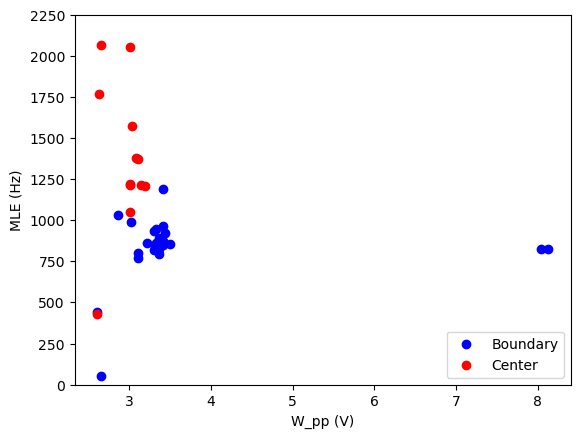

In [4]:
plt.ylabel("MLE (Hz)")
plt.xlabel("W_pp (V)")
plt.scatter(np.array(df["W_pp (V)"]),np.array(df["MLE (Hz)"]),color="blue")
plt.scatter(np.array(df_middle["W_pp (V)"]),np.array(df_middle["MLE (Hz)"]),color="red")
plt.legend(["Boundary","Center"],loc="lower right")
#plt.xlim(2.5,3.7)
plt.ylim(0,2250)
plt.show()